In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 生成数据

In [3]:
def gen_data():
    x = np.random.randint(0,30,(20,5))
    w = np.random.randint(0,15,(1,5))
    b = np.random.rand()
    
    y = np.dot(x,w.T) + b
    print('w:{}'.format(w))
    print('b:{}'.format(b))
    return x,y

In [4]:
gt_x,gt_y = gen_data() 

w:[[11  6  2  8  7]]
b:0.9819441653094491


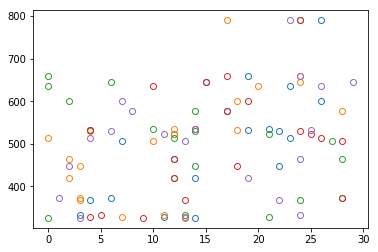

In [7]:
plt.plot(gt_x,gt_y,marker='o',markerfacecolor='none',ls='')

In [22]:
x = gt_x[:,]
x

array([[12, 12, 21, 25, 11],
       [21, 12, 10, 14, 14],
       [14,  2, 12, 12, 19],
       [22,  3, 14, 18,  2],
       [12,  2, 28, 12, 24],
       [ 4,  3, 24, 13, 22],
       [ 7, 10, 27, 28, 13],
       [19, 18,  4,  4, 25],
       [26, 18,  2, 19,  7],
       [11,  7, 21,  4, 13],
       [22,  4, 14, 24,  6],
       [26, 17, 24, 24, 23],
       [19, 24,  0, 17, 24],
       [ 3, 11, 13,  5, 24],
       [23, 20,  0, 10, 26],
       [15, 24,  6, 15, 29],
       [17, 28, 14, 17,  8],
       [14, 13,  0,  9,  3],
       [ 6,  3, 28, 28,  1],
       [23,  0, 12, 26,  4]])

In [24]:
gt_x[:,1]

array([12, 12,  2,  3,  2,  3, 10, 18, 18,  7,  4, 17, 24, 11, 20, 24, 28,
       13,  3,  0])

ValueError: x and y must be the same size

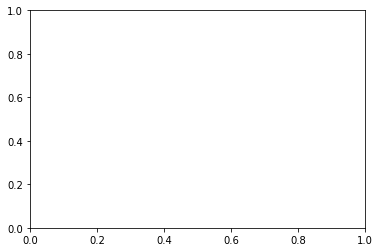

In [14]:
plt.scatter(gt_x,gt_y)

In [ ]:
gt[;,]

### 预测y

In [4]:
def predict(w,b,x):
    pred_y = np.dot(x,w.T) + b
    return pred_y

### loss：MSE

In [5]:
#这里loss和梯度都必须用pred_y-gt_y!!!!!!!否则不收敛！
#因为pred_y-gt_y = wx+b-gt_y是开口向上的，是凸函数！！！！
def loss_MSE(gt_x,gt_y,w,b):
    avg_loss = 0
    pred_y = predict(w,b,gt_x)
    avg_loss = np.sum(pred_y - gt_y)**2/len(gt_y)
    return avg_loss

### 梯度计算

In [6]:
def cal_step_gradient(gt_x,gt_y,w,b,lr):
    dw = np.zeros((1,5))
    db = 0
    pred_y = predict(w,b,gt_x)
    
    diff = pred_y - gt_y
    dw = np.dot(diff.T,gt_x)
    db = diff
    
    w = w - lr * dw
    b = b - lr * db
    return w,b

### 训练

In [7]:
def train(gt_x,gt_y,lr,max_iter):
    #w和b的初始值
    w = np.zeros((1,5)) 
    b = 0
    for i in range(max_iter):
#         print('this is：{} times'.format(i))
        w,b = cal_step_gradient(gt_x,gt_y,w,b,lr)
        print('loss is {}'.format(loss_MSE(gt_x,gt_y,w,b)))
    print('w:{}'.format(w))
    print('b:{}'.format(b))
    return w,b

In [8]:
train(gt_x,gt_y,0.00001,800)

loss is 2016386.4172659267
loss is 1278763.9107328574
loss is 811599.9898767469
loss is 515597.89715720544
loss is 327944.0580761717
loss is 208897.91730398103
loss is 133312.1447244144
loss is 85270.27028404767
loss is 54695.492002737956
loss is 35205.911588263494
loss is 22757.952868462322
loss is 14788.215726159973
loss is 9670.55360478165
loss is 6372.522537632839
loss is 4237.940628927155
loss is 2849.2274416608316
loss is 1940.2216226247033
loss is 1340.9433278436254
loss is 942.5776606550692
loss is 675.2619128543927
loss is 493.98319319181576
loss is 369.6159236503265
loss is 283.2186118923159
loss is 222.39891882115617
loss is 178.99244990027847
loss is 147.57694133687394
loss is 124.51842377089149
loss is 107.35673884662056
loss is 94.40799580147436
loss is 84.50607619713705
loss is 76.83354625621396
loss is 70.81027988293
loss is 66.0195051137868
loss is 62.1582518990913
loss is 59.00381324351771
loss is 56.39079393315586
loss is 54.19521948886154
loss is 52.323398497572285


(array([[ 5.00234373,  2.00931278, 12.00057888,  3.00722488,  7.00549444]]),
 array([[-0.03743202],
        [ 0.06864885],
        [-0.0918971 ],
        [ 0.04069256],
        [-0.06665419],
        [ 0.06144364],
        [ 0.01484537],
        [-0.00050877],
        [ 0.05046936],
        [ 0.09228229],
        [ 0.07180513],
        [ 0.03135618],
        [ 0.01165318],
        [ 0.04034396],
        [ 0.09098198],
        [-0.02213352],
        [-0.00597197],
        [-0.02062903],
        [ 0.07265478],
        [ 0.03416061]]))